# CNN Notes

I have been working through Andrew Ng's Deep Learning Specialisation. Here are some of the notes I took during the Convolutional Neural Networks Course. Hopefully they can be of use to you. Some images are taken from the slides in the course.

## Notes
### Foundations of Convolutional Neural Networks

#### Vertical Edge Detection
You have a filter and you 'convolve' it with the input image
You do an element-wise product with the filter overlaying the input image in different positions.
The filter for vertical edge detection typically looks something like this
$$
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}
$$

#### Positive and Negative Vertical Edges
Distinguishes between light-to-dark and dark-to-light edges

#### Learning to Detect Edges
Modern DL does not explicitly define the filter, but rather sets each of the elements as a weight/parameter that the model can learn itself.

#### Padding
Normal convolutions have some problems. They do not use much information from the edge pixels and they also shrink the output. You can get around both of these problems by padding the border of the input with zeroes.

#### Size of output
$(n+2p-f+1) \times (n+2p-f+1)$

#### Valid Convolutions
No padding
#### Same Convoultions
Output size is the same as the input size.
You can achieve this if you set $f$ and $p$ to be
$$p = \frac{f-1}{2}$$
To make this formula work, $f$ is normally odd.
This has some advantages such as the filter having a central pixel.

#### Strided Convolutions
You can add a 'stride' parameter $s$ to the convolution. This means you 'jump' the filter over by $s$ pixels each time.
The new formula for computing the output size is
$$\lfloor \frac{n+2p-f}{s} + 1\rfloor \times \lfloor \frac{n+2p-f}{s} + 1\rfloor $$
Where $\lfloor x \rfloor$ denotes the 'floor' of the expression

#### Convolutions over Volume
You can convolve a 3d input with a 3d filter. You put the 3d filter over the 3d input as you would in 2d, and you calculate the element-wise product and use that as the first cell of the output. 

Note: the input volume and filter need to have the same number of channels.

The model can learn to detect more complex patterns such as vertical edges in only the red channel for example.

#### Multiple Filters
You can have multiple filters per layer
If you have $n_c'$ filters, then you will have $n_c'$ outputs, which you stack to form a $\lfloor \frac{n+2p-f}{s} + 1\rfloor \times \lfloor \frac{n+2p-f}{s} + 1\rfloor \times n_c'$ output

#### One Layer of a CNN
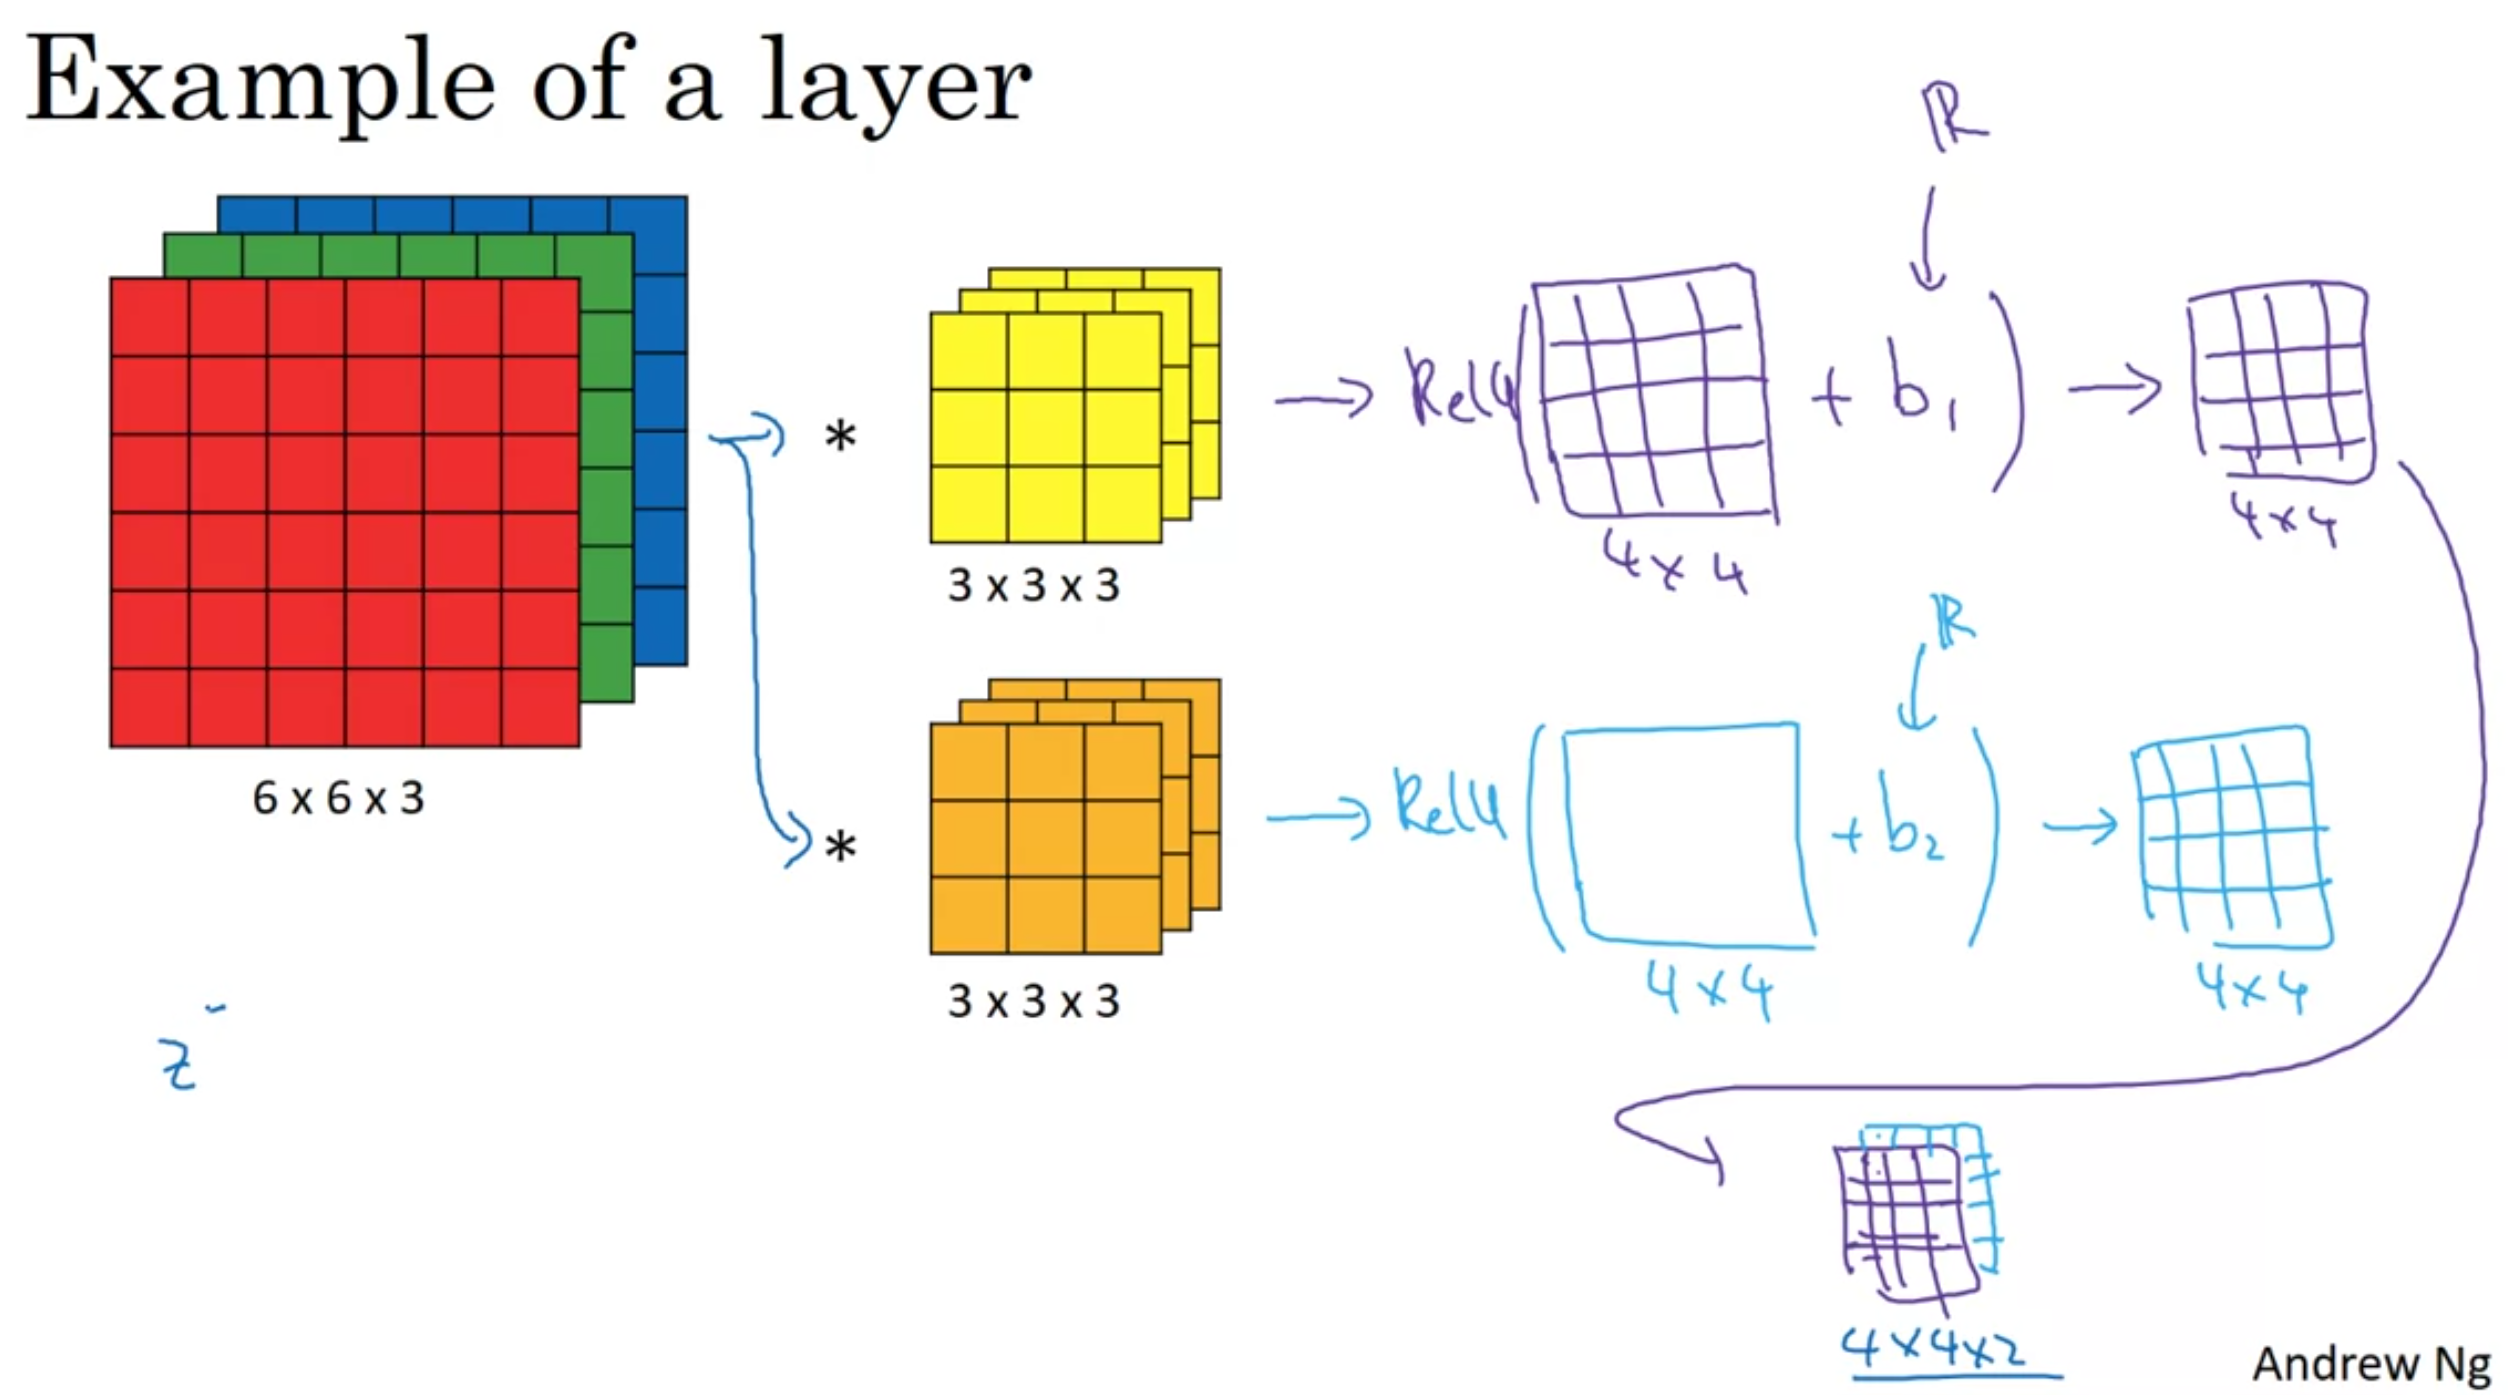

#### Multi-Layer CNN
As you get deeper in the NN, you reduce height and width, while increasing the number of channels.

#### Pooling Layers: Max Pooling
You get the max of the corresponding region
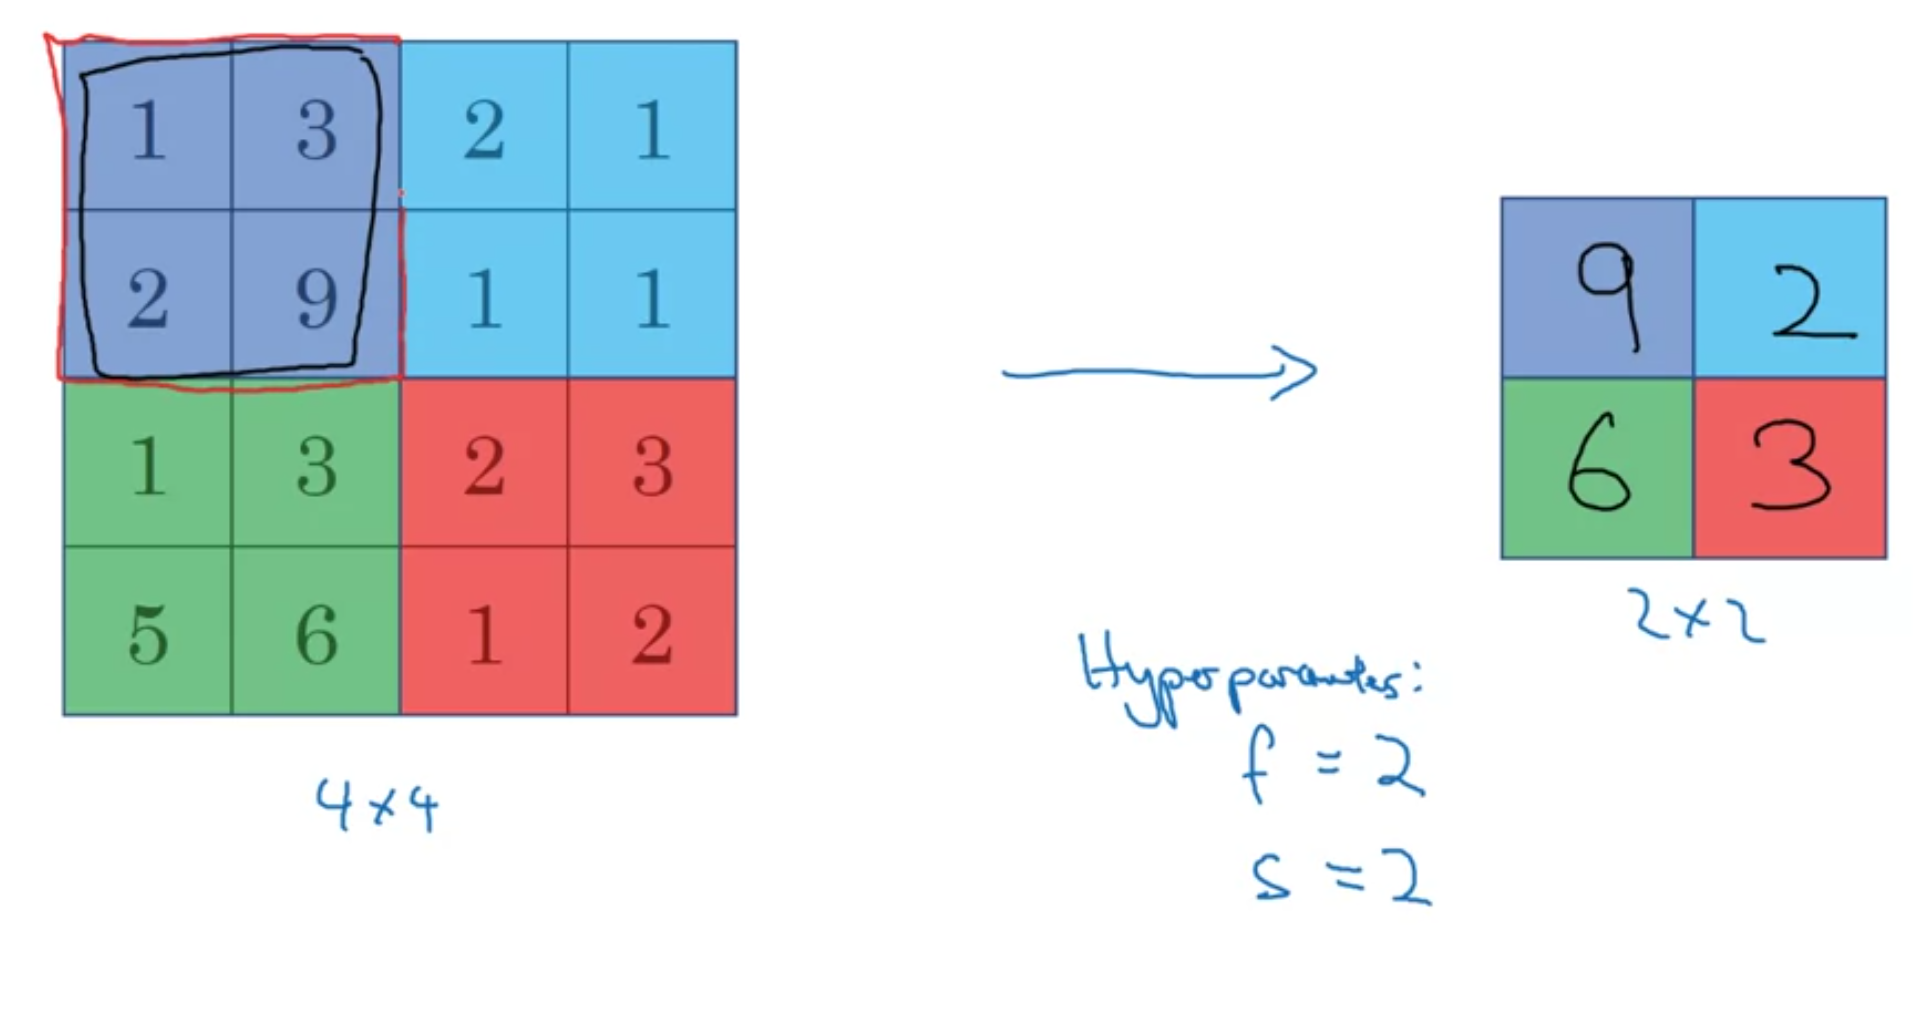
Max pooling has hyperparameters $f$ and $s$, but it does not have any weights to learn.

The same formula for computing the size of the output still works here:
$$\lfloor \frac{n+2p-f}{s} + 1\rfloor \times \lfloor \frac{n+2p-f}{s} + 1\rfloor \times n_c$$

#### Average Pooling
This is the same as max pooling, but taking the average of the region instead of the max.

Note: padding is very rarely used in either max or average pooling

#### Convolutional Neural Network Example

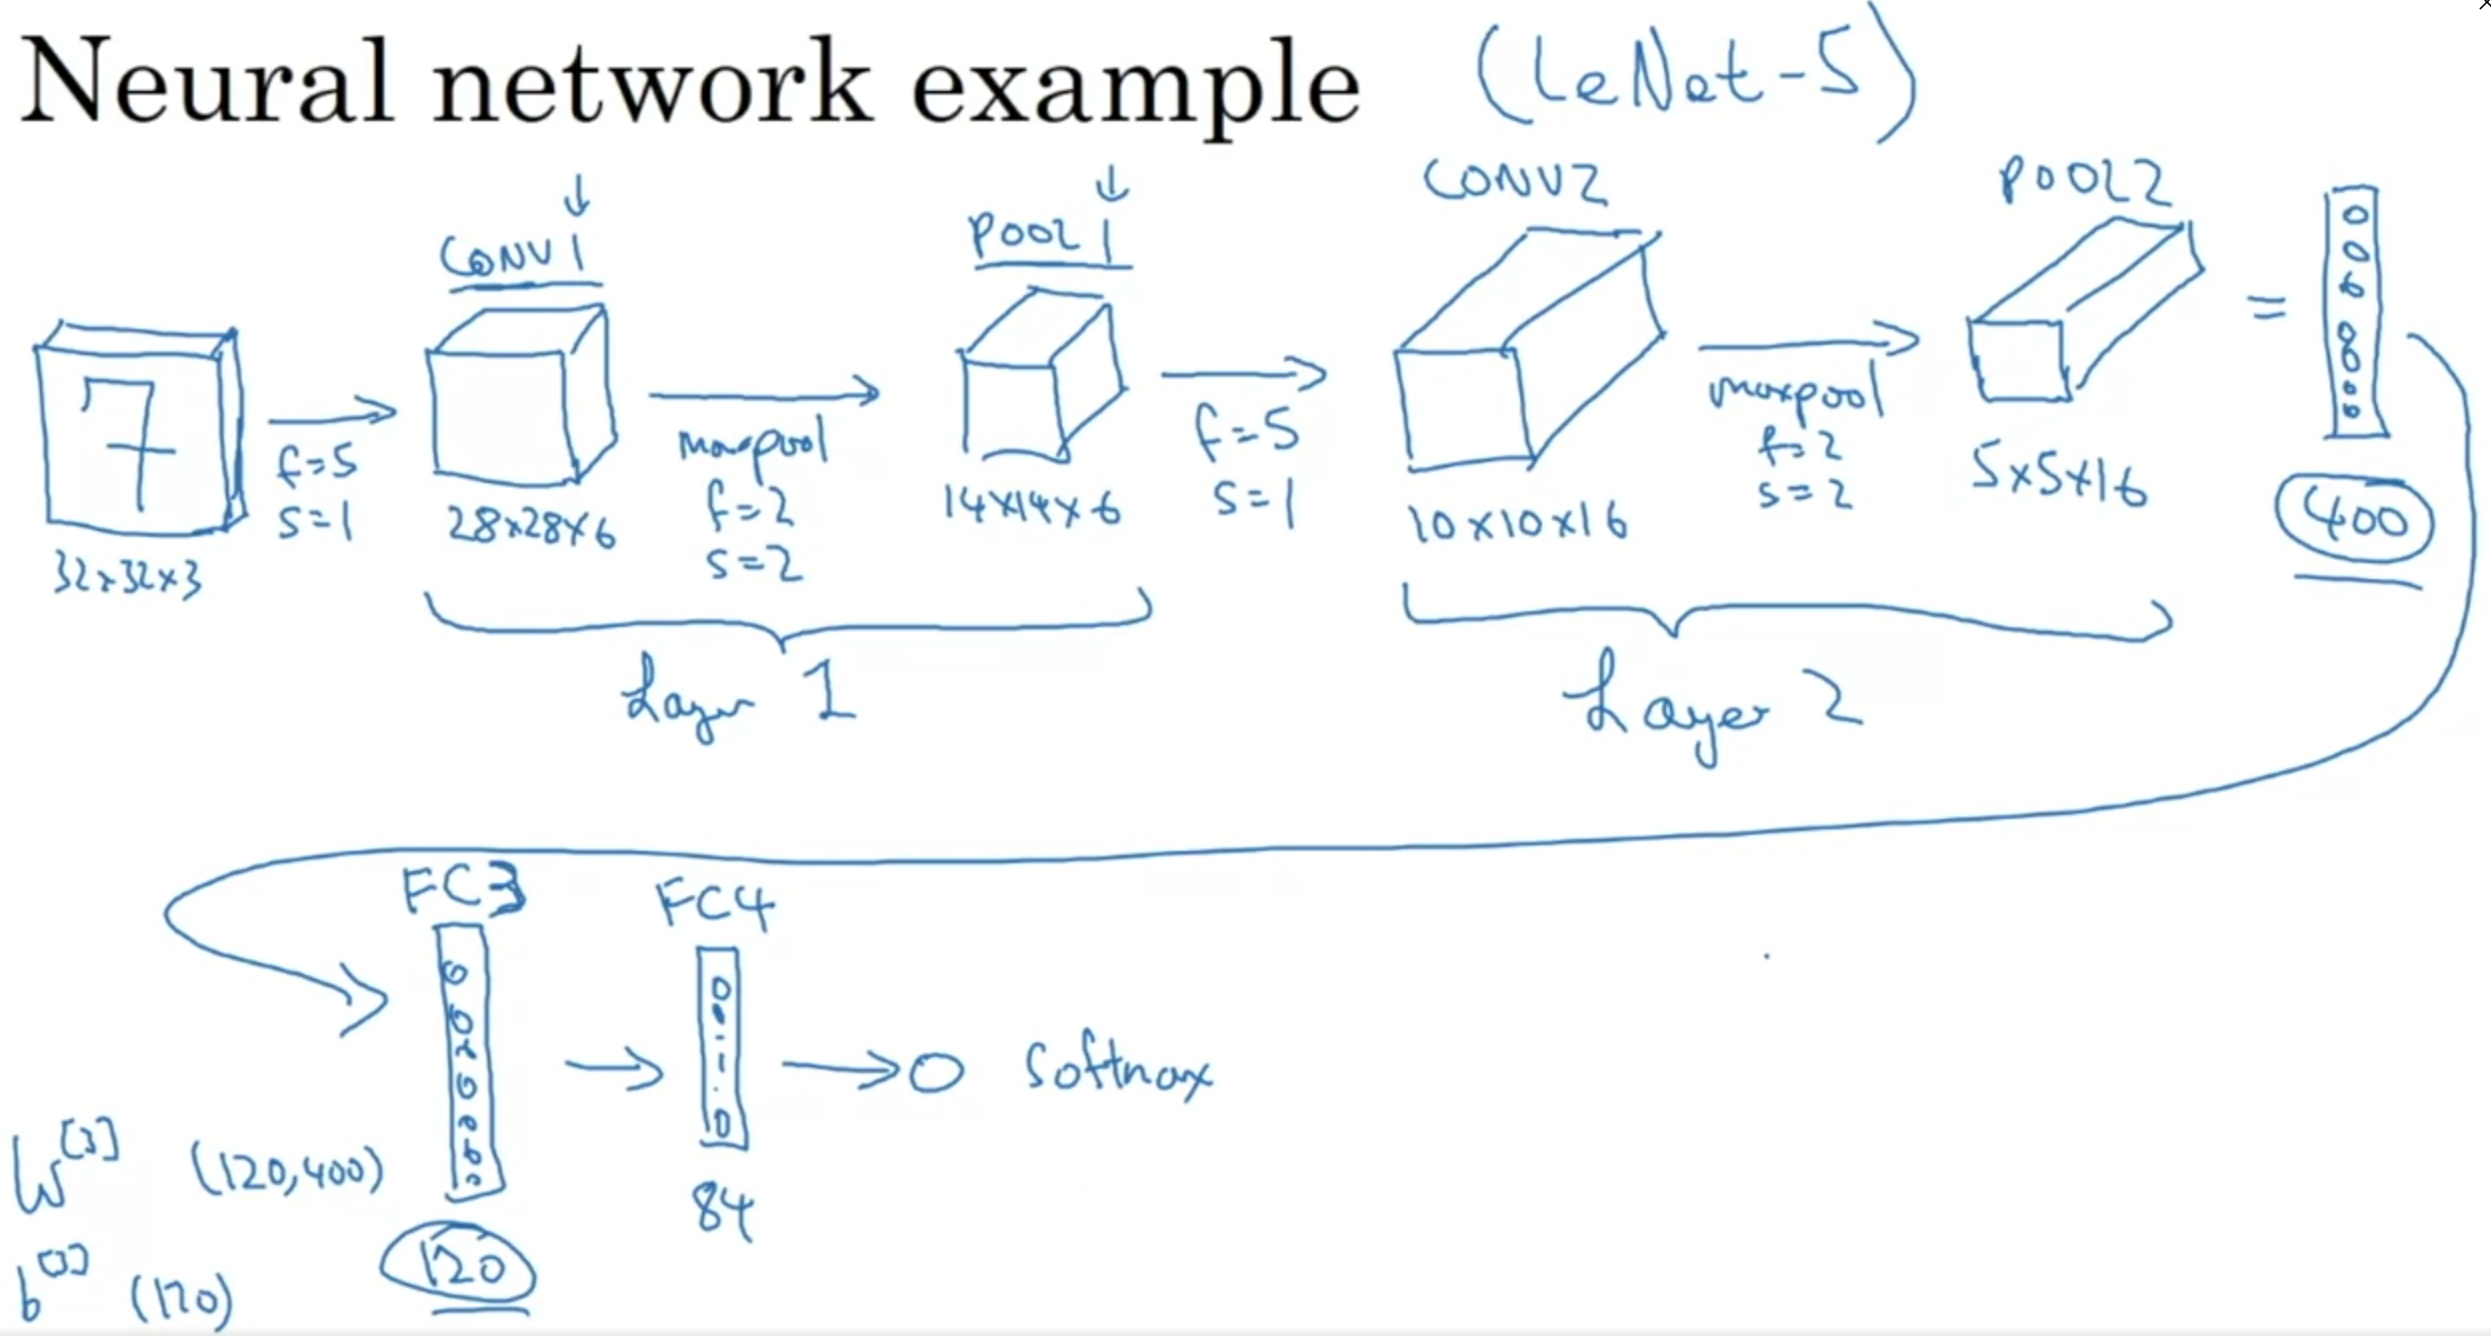
Normally, we put one or more convolutional layer (CONV) followed by a pooling layer (POOL), and repeat this pattern multiple times.

When we are done with the convolutional layers, we 'flatten' them out and pass them through a few fully connected (FC) layers.


#### Why Convolutions?
1. Parameter Sharing
2. Sparcity of Connections

Parameter sharing lets learned parameters to be used in multiple parts of the image. This drastically reduces the total number of parameters required in the neural network.

Sparcity of Connections: since every output is calculated on a small section of the input at a time, it will be easier to learn the parameters.

#### Putting it all together
1. Decide on an architecture
2. Decide on a loss function $L$
3. Randomly initialize all the weights and biases
4. Use an optimizer (like gradient descent or Adam) to optimize the parameters


### More Complicated CNNs
#### Residual Blocks (ResNets)
Residual blocks get around the vanishing/exploding gradients problem in very deep NNs.

They copy an activation from one layer and feed it into another layer deeper in the network.

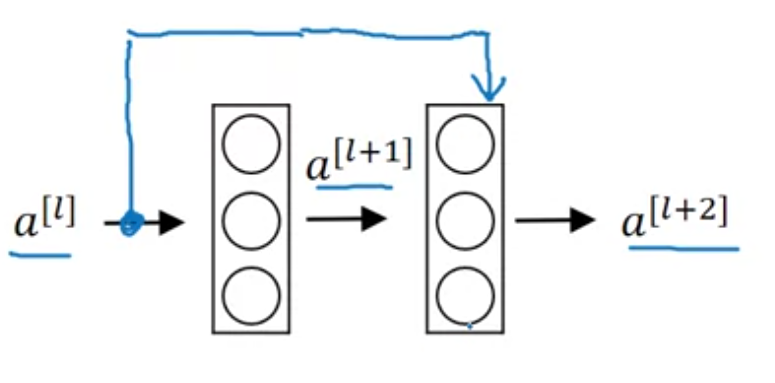

$$a^{[l+2]} = g(z^{[l+2]} + a^{[l]})$$

If you add more and more layers to a traditional FFNN, it can actually increase training error.

Adding a ResNet layer doesn't hurt training error because it is very easy for it to learn the identity function.

One thing to note, is that $a^{[l]}$ and $a^{[l+2]}$ have to have the same dimension for the addition to work, so a lot of 'same' convolutions are used for this reason.

#### 1x1 Convolutions
1x1 convolutions are used to change the number of channels, $n_c$.
For example, if you have a $28 \times 28 \times 192$ layer input, and want to reduce the number of channels to $32$ then you pass is through a $1 \times 1$ convolution with $32$ filters

#### Inception Layers
Inception layers can have multiple filter sizes and stack the outputs
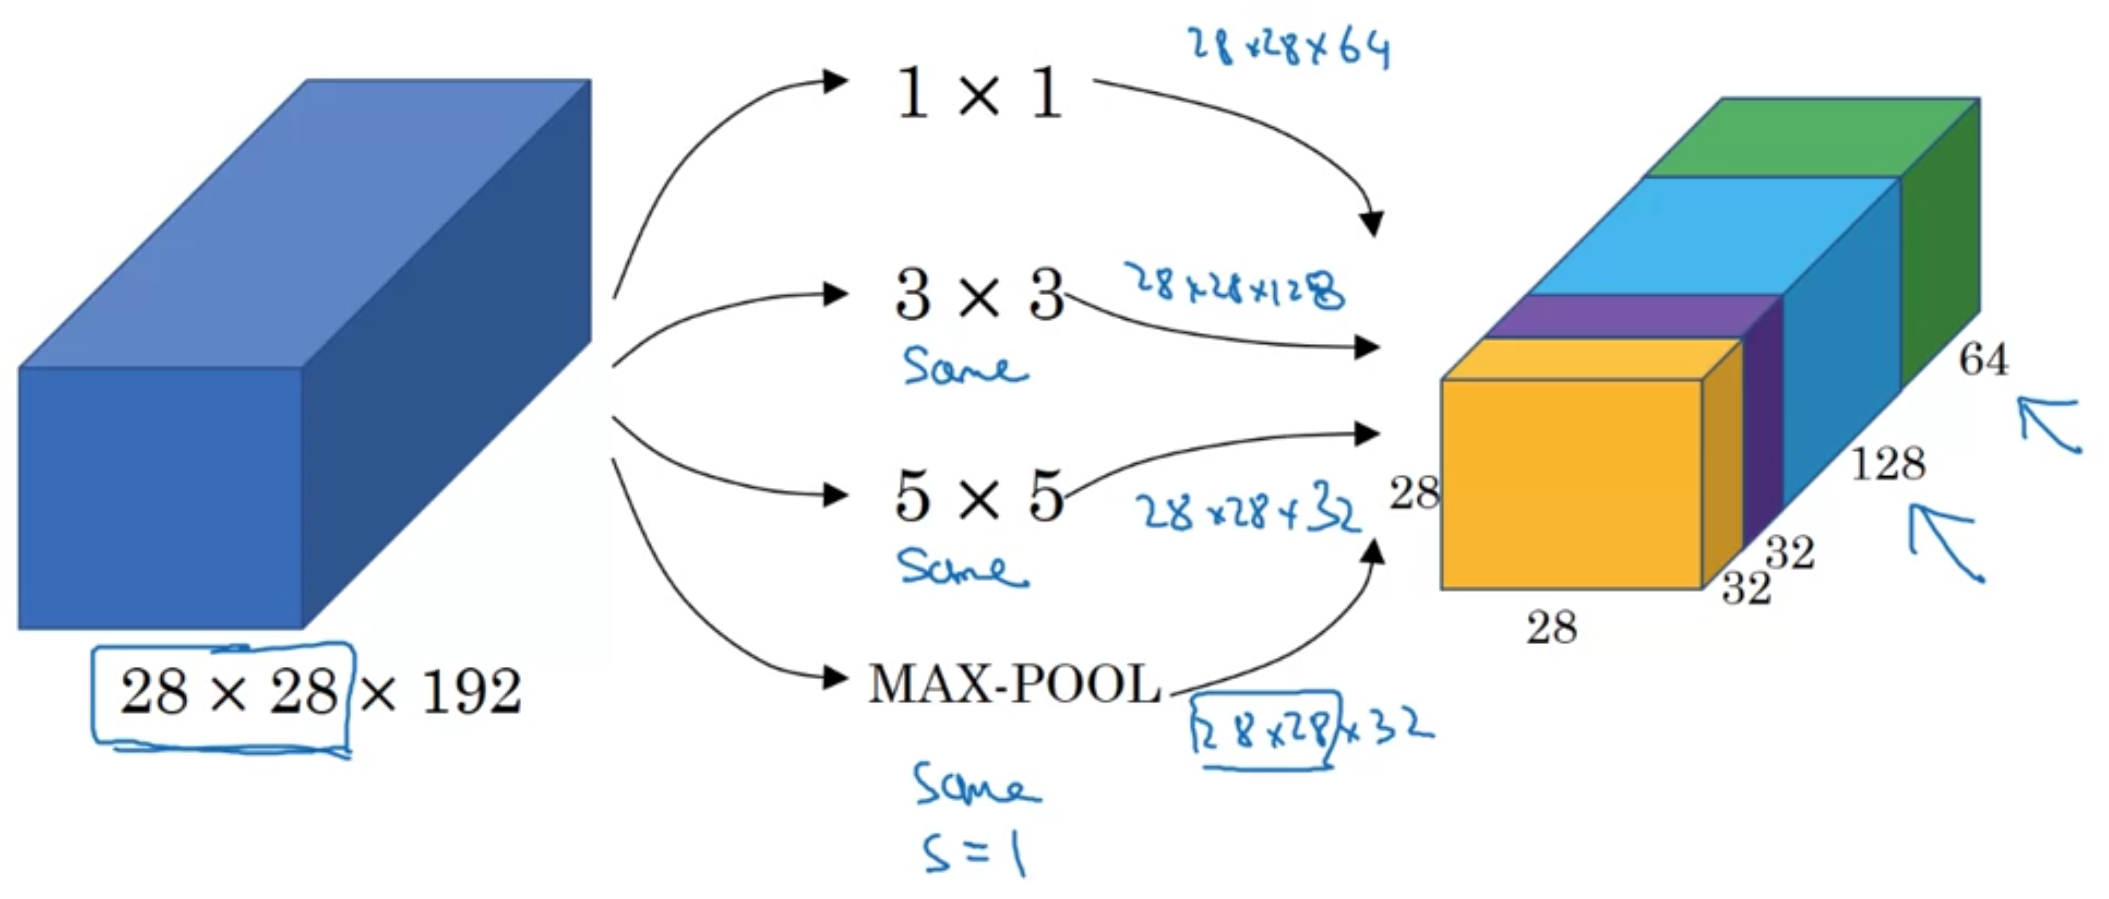

This lets the model learn which of the filters are most useful and learns the correct parameters for them by itself.

We can reduce the computational cost of inceptions layers by using a $1 \times 1$ convolution to calculate the $5 \times 5$ convolution.
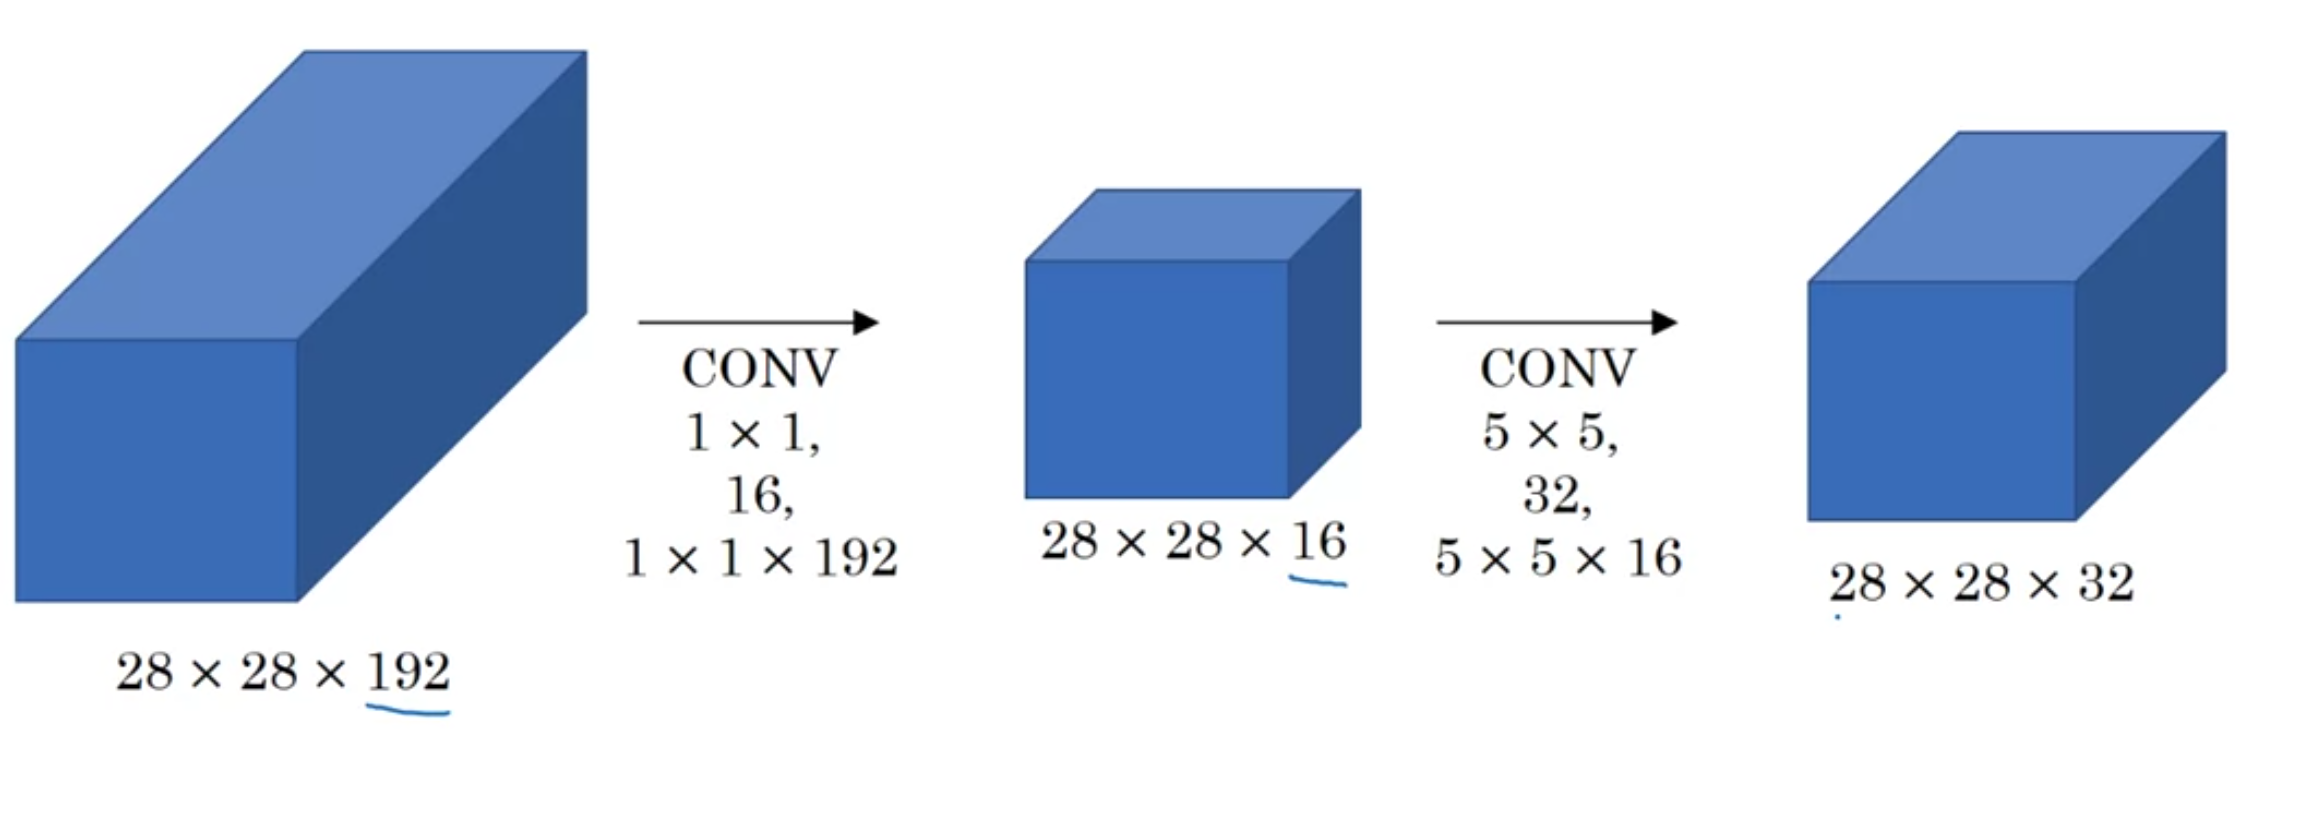

So long as you implement the bottleneck layer within reason, you retain a lot of the power of the original $5 \times 5$ convolution.

We can do the same for the $3 \times 3$ convolution. 

The inception layer now looks like this.
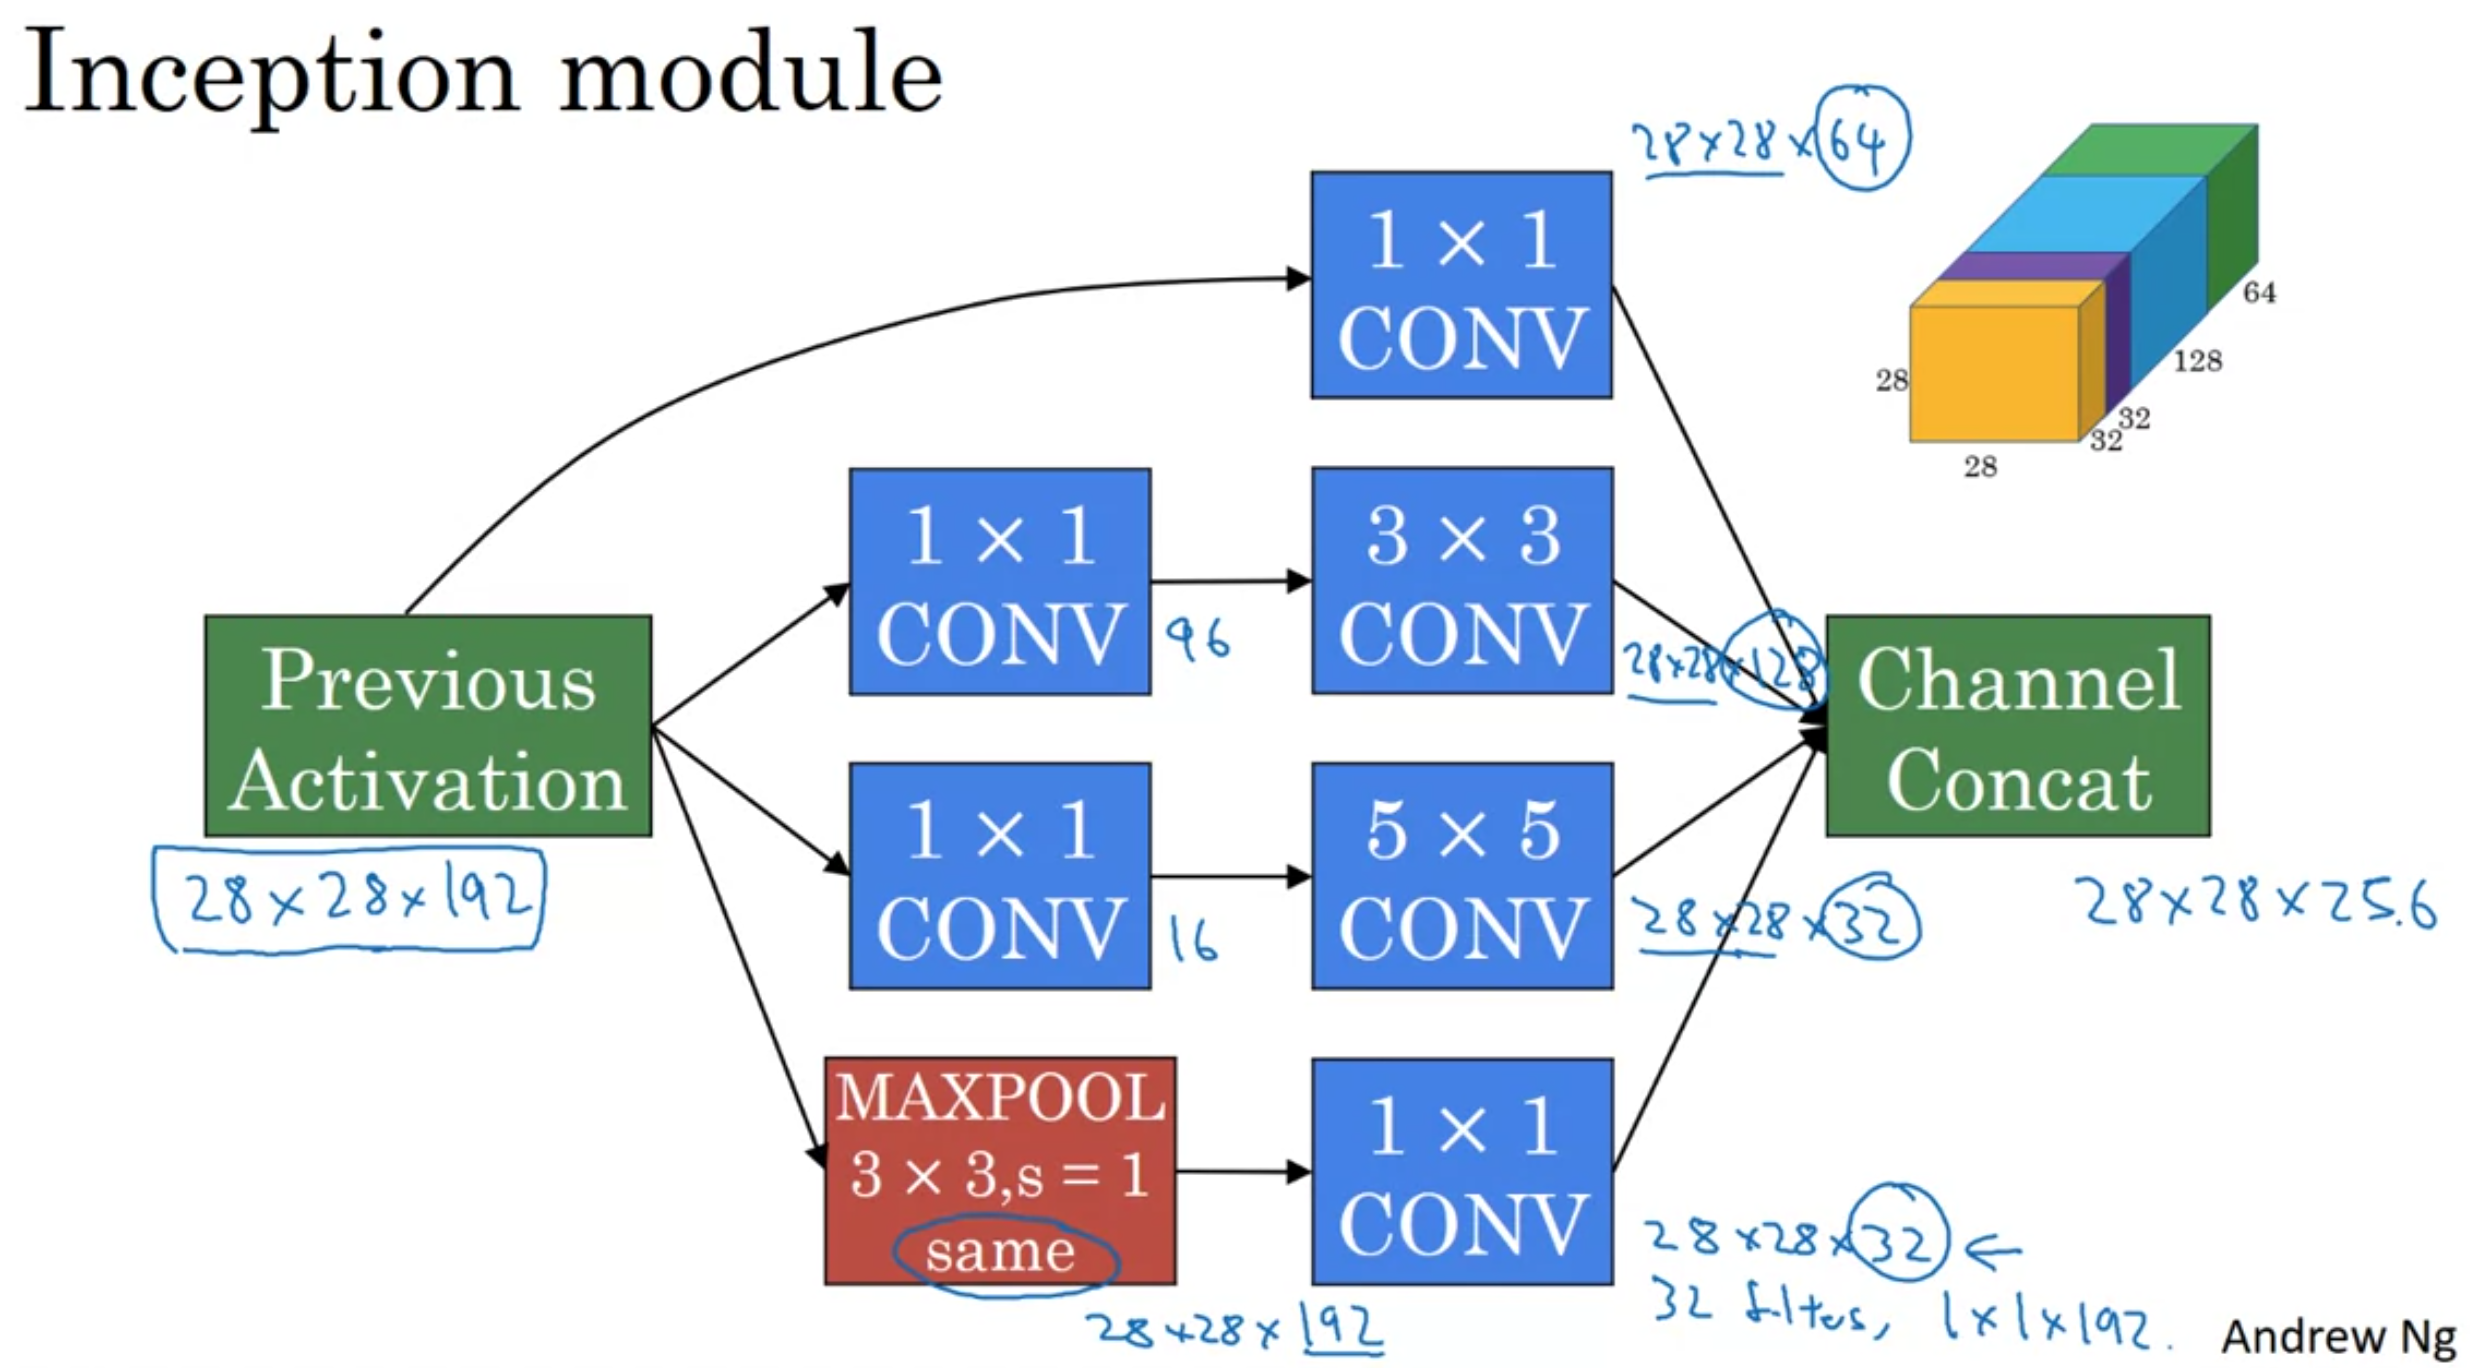

Although the maxpool layer gives the correct number of channels as output, it's still significantly higher than the others, so we pass it through a $1 \times 1$ convolution with a smaller number of filters, for example $32$ so it takes up a more reasonable amount of the total channels.

#### Depthwise Separable Convolution
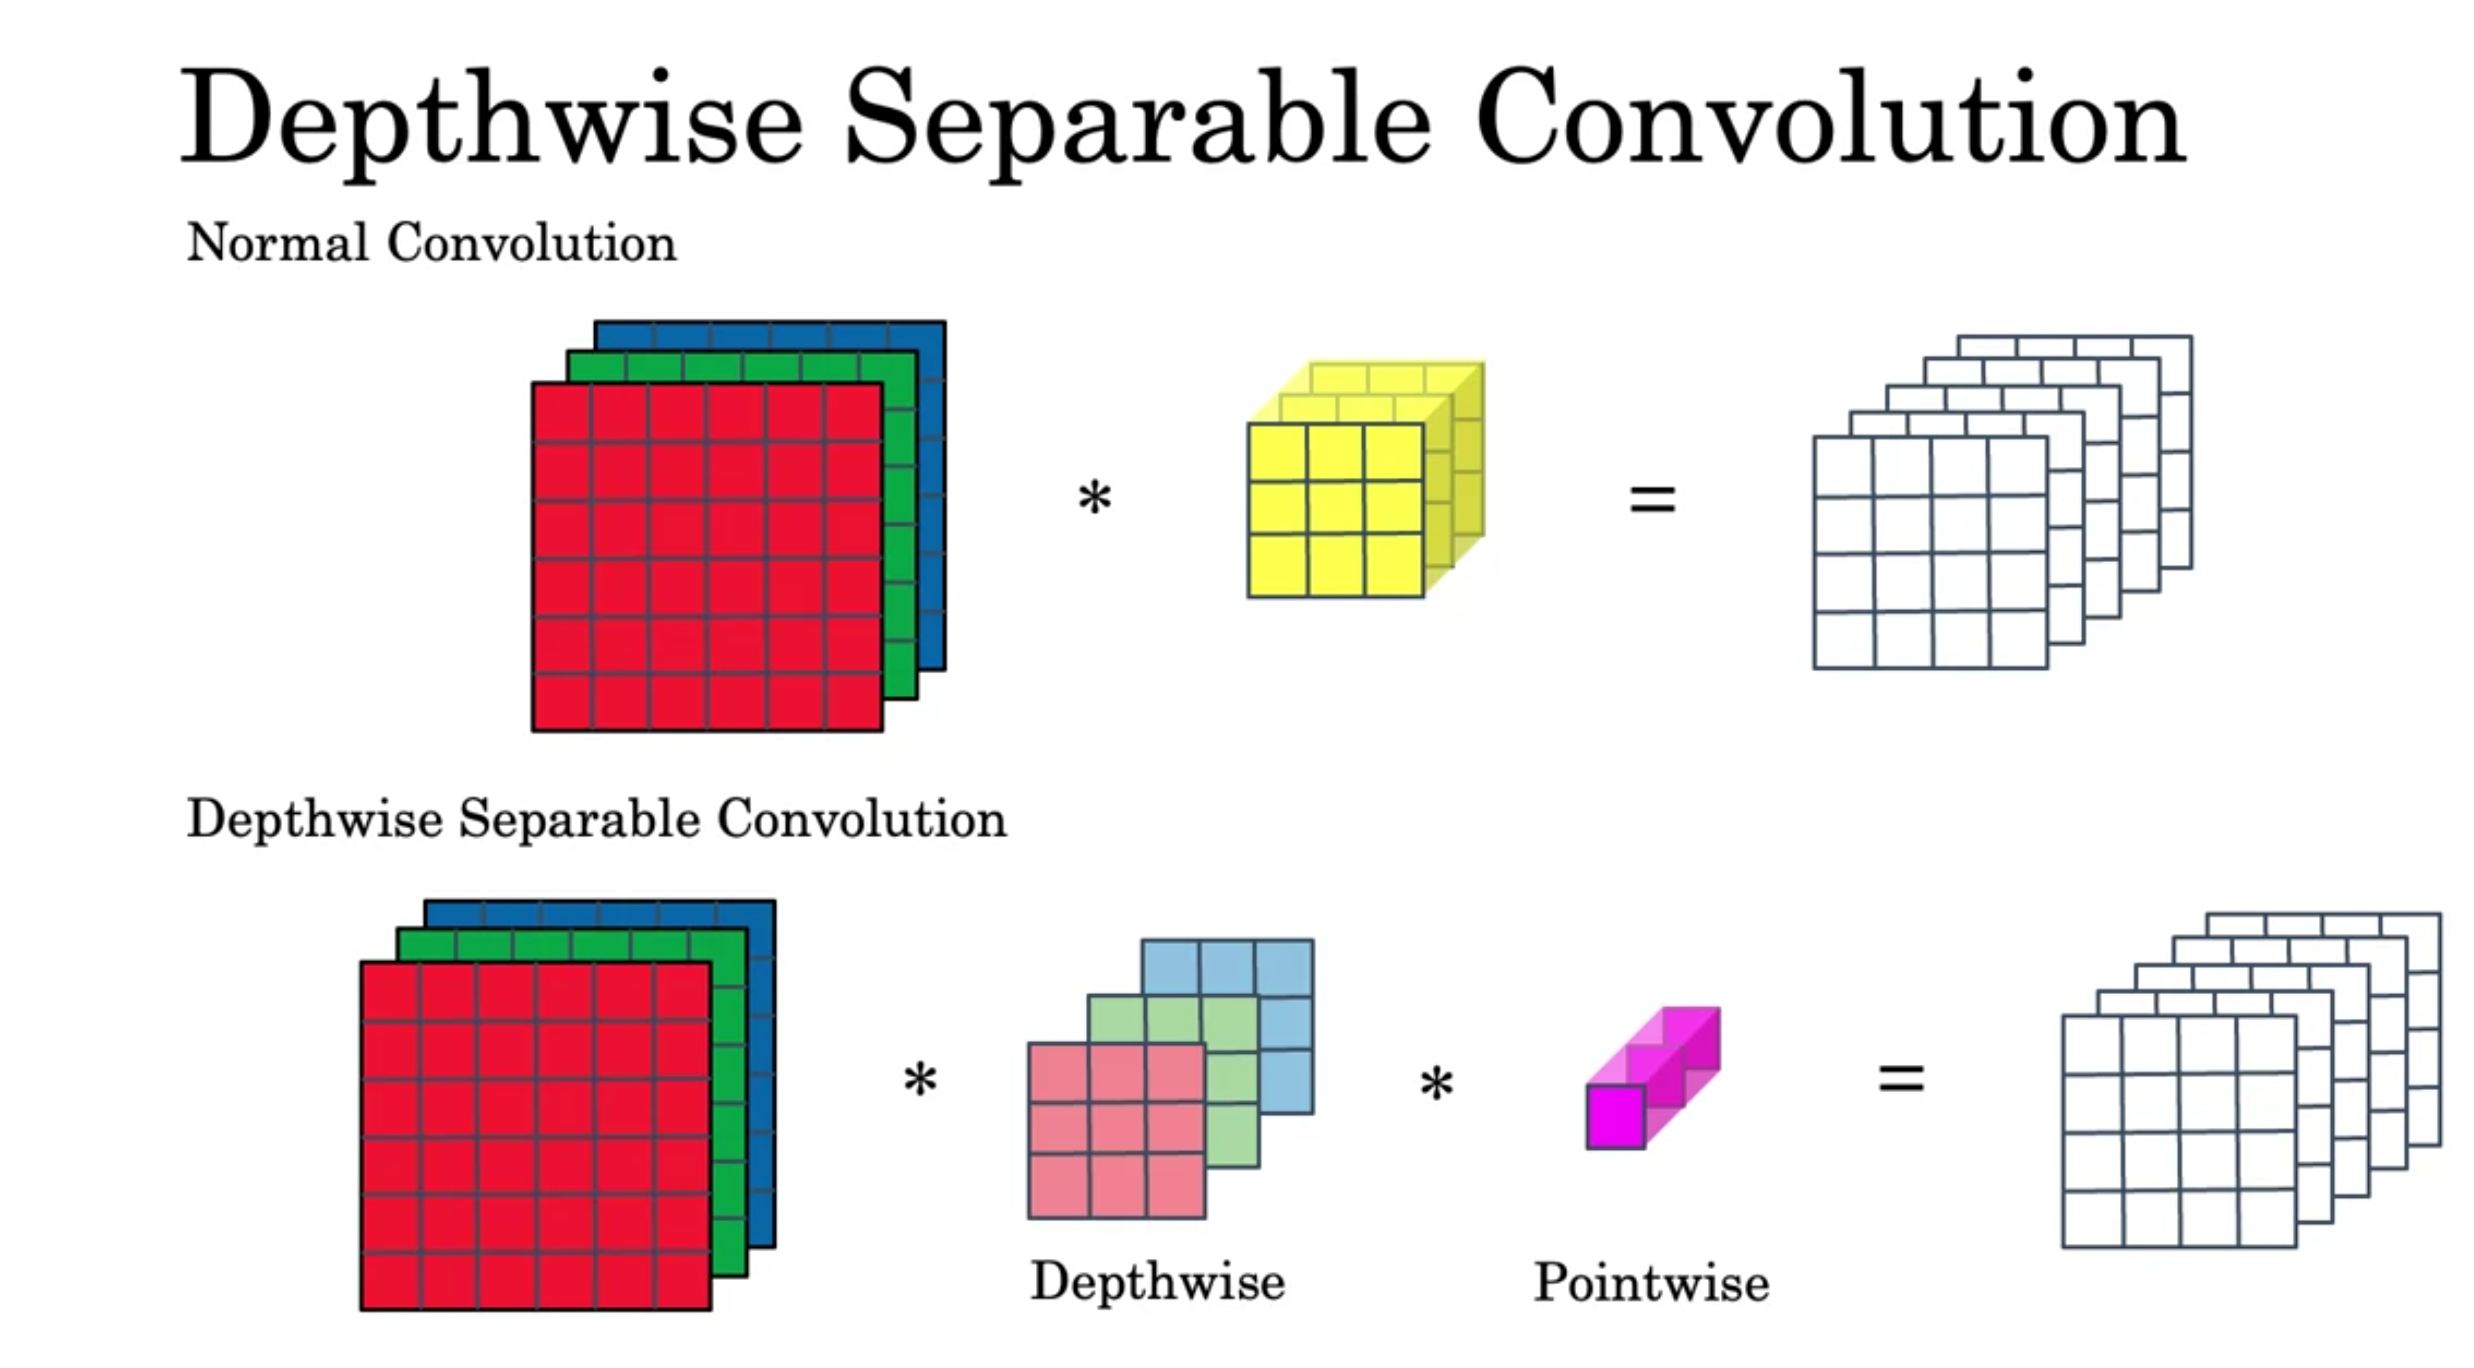
You first pass the input into a Depthwise Convolution and then into a Pointwise Convoluion.

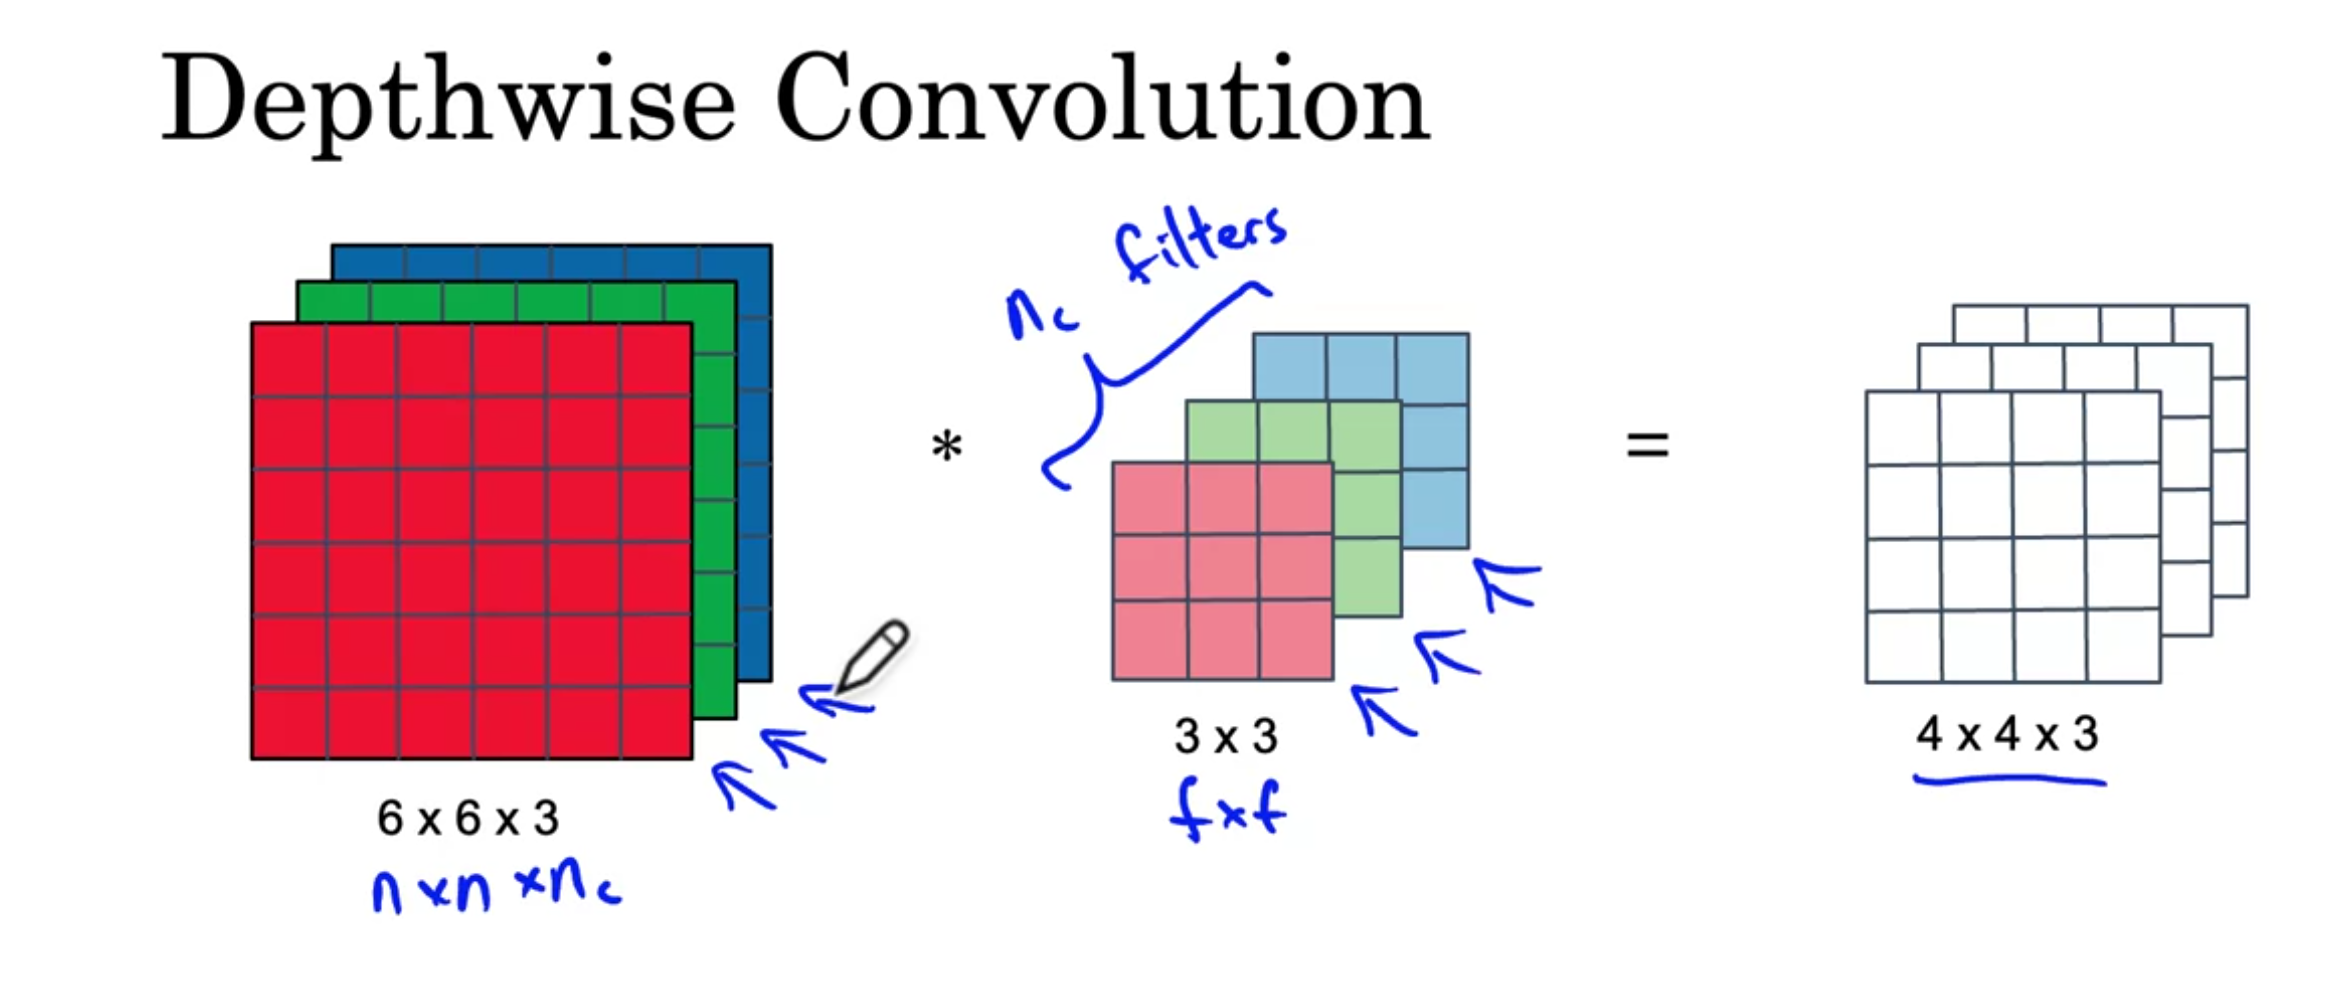
The depthwise convolution works as follows, you convolve each of the input channels with only the corresponding filter channel. The outputs give the outputs of each of the channels of the output.

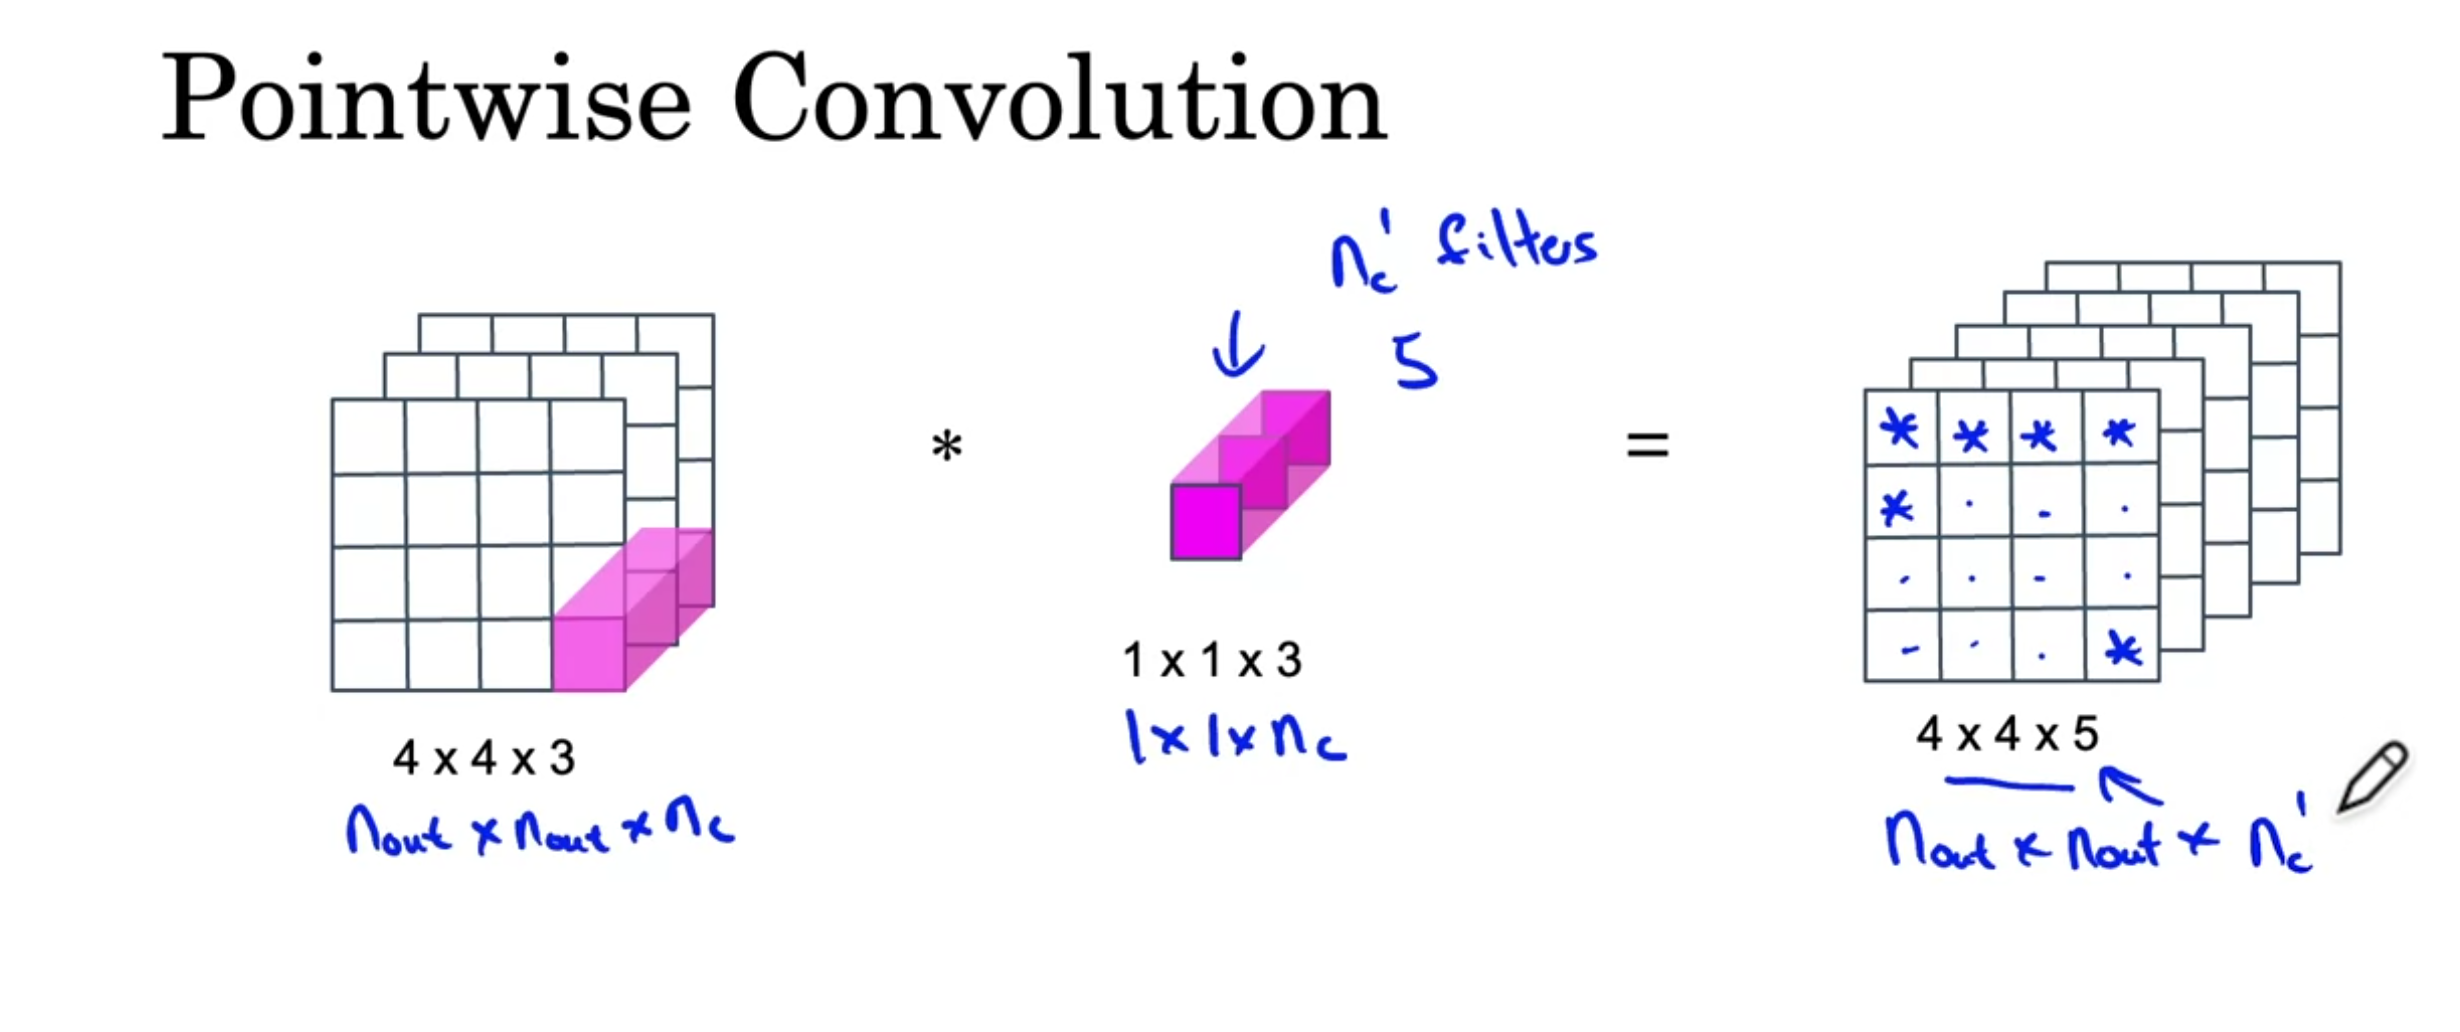
For the pointwise convolution, you have $n_c'$ filters of size $1 \times 1 \times n_c$. The output is calculated one channel at a time, using the calculated convolution between the input and each of the filters.

Depthwise separable convolutions tend to be a lot faster than normal convolutions. The ratio of computation time is given by

$$\frac{1}{n_c'} + \frac{1}{f^2}$$

#### Image Classification, Localization and Detection
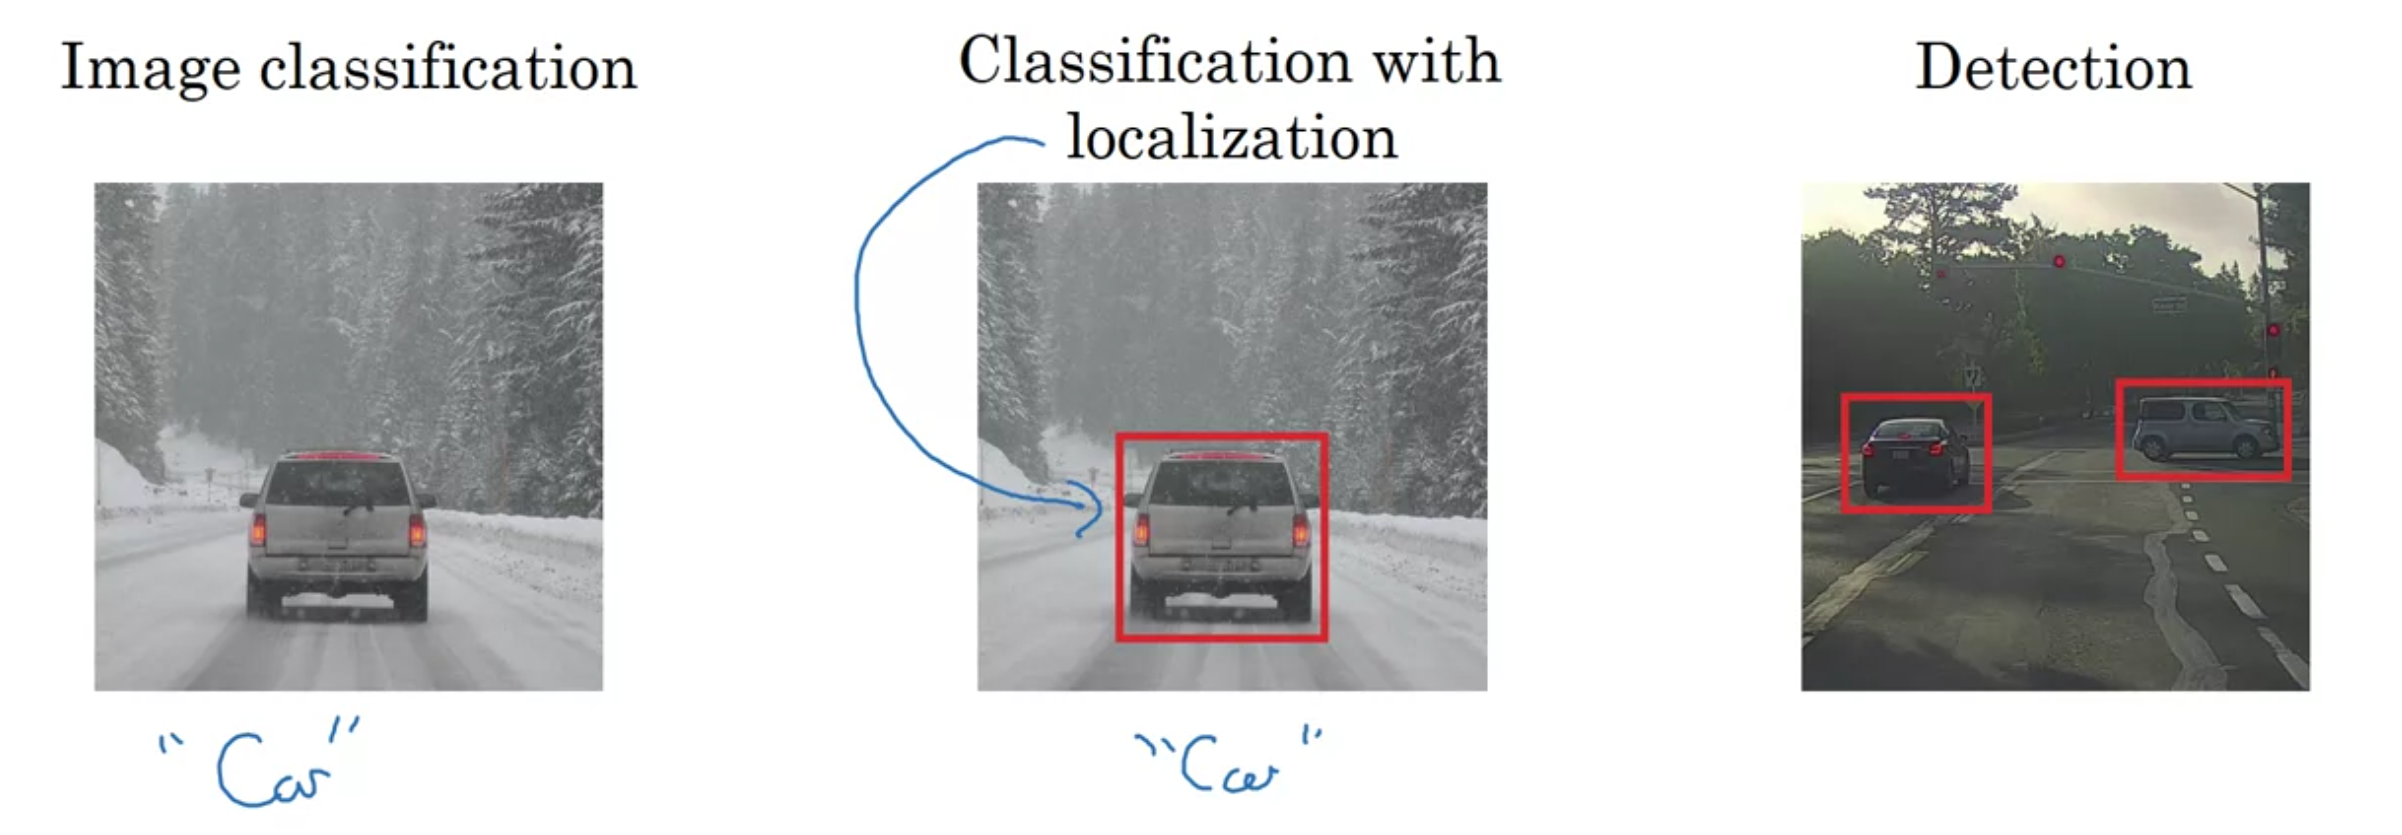

**Image classification**: Detecting presence or absense of an object

**Classification with localization**: Detects presence or absence of object *and gives its location*

**Detection**: Gives locations of multiple objects in an image.

#### Classification with localization
To train a model to do classification with localization, your training data needs to have images as inputs and a vector $y$ as the label.

$$ \begin{bmatrix}
p_c \\
b_x \\
b_y \\
b_h \\
b_w \\
c_1 \\
c_2 \\
c_3 
\end{bmatrix}
$$

The loss function $L(\hat{y}, y)$ can be defined using the squared error:
$$
L(\hat{y}, y) =
\begin{cases} 
(y_{\hat{1}} - y_1)^2 + (y_{\hat{2}} - y_2)^2 + \cdots + (y_{\hat{8}} - y_8)^2 & \text{if } y_1 = 1, \\
(y_{\hat{1}} - y_1)^2 & \text{if } y_1 = 0.
\end{cases}
$$

#### Landmark Detection
The above method can also be used for landmark detection. By selecting multiple landmarks and labelling them with (for example in people's faces), the model can learn to do landmark detection on new, unseen faces.